# Machine Learning with scikit-learn
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats

# Import the course datasets
auto = pd.read_csv("datasets/auto.csv")
boston = pd.read_csv("datasets/boston.csv")
diabetes = pd.read_csv("datasets/diabetes.csv")
gapminder = pd.read_csv("datasets/gm_2008_region.csv")
votes = pd.read_csv("datasets/votes.csv")
whitewine = pd.read_csv("datasets/white-wine.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [2]:
# Add your code snippets here

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills! Below are the DataFrames and the target variables you can pratice making predictions on.
- `auto`: `mpg`, the miles per gallon of used cars.
- `boston`: `MEDV`, the median value of owner-occupied homes in thousands of dollars.
- `diabetes`: `diabetes`, `0` indicates that the patient does _not_ have diabetes, while a value of `1` indicates that the patient _does_ have diabetes.
- `gapminder`: `life`, life expectancy
- `party`: party affiliation (`democrat` or `republican`)
- `whitewine`: `quality`

## Classification

### Numerical EDA
Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

* Note here the dataset in the notebook differs with the proportion education counts. Rows with a `?` for a value need to be labeled as no for a relevant count plot 

In [3]:
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
# df.dtypes in exercise are 
[(votes[x].unique(), x, votes[x].value_counts(normalize=True)) for x in votes.columns]

[(array(['republican', 'democrat'], dtype=object),
  'party',
  democrat      0.613793
  republican    0.386207
  Name: party, dtype: float64),
 (array(['n', '?', 'y'], dtype=object),
  'infants',
  n    0.542529
  y    0.429885
  ?    0.027586
  Name: infants, dtype: float64),
 (array(['y', 'n', '?'], dtype=object),
  'water',
  y    0.448276
  n    0.441379
  ?    0.110345
  Name: water, dtype: float64),
 (array(['n', 'y', '?'], dtype=object),
  'budget',
  y    0.581609
  n    0.393103
  ?    0.025287
  Name: budget, dtype: float64),
 (array(['y', '?', 'n'], dtype=object),
  'physician',
  n    0.567816
  y    0.406897
  ?    0.025287
  Name: physician, dtype: float64),
 (array(['y', '?', 'n'], dtype=object),
  'salvador',
  y    0.487356
  n    0.478161
  ?    0.034483
  Name: salvador, dtype: float64),
 (array(['y', 'n', '?'], dtype=object),
  'religious',
  y    0.625287
  n    0.349425
  ?    0.025287
  Name: religious, dtype: float64),
 (array(['n', 'y', '?'], dtype=object),
  

#### Column Updates
* party - good, no changes
* infants - '?' to 'n' - 0
* water - ? to 'y' - 1
* budget - ? to 'y' - 1
* physiciain - ? to 'y' - 1
* salvador - ? to 'y' - 1
* religious - ? to 'y' - 1
* satelite - ? to 'y' - 1
* aid - ? to 'y' - 1
* satelite - ? to 'y' - 1
* missile - ? to 'y' - 1
* immigration - ? to 'y' - 1
* synfuel - ? to 'y' - 1
* education - ? to 'y' - 1
* superfund - ? to 'y' - 1
* crime - ? to 'y' - 1
* duty_free_export - ? to 'y' - 1
* eaa_rsa - ? to 'y' - 1

In [5]:
# Replace 1 Infant column instance of '?' to N
votes['infants'].replace({'?': 'n'}, inplace=True)
votes['infants'].value_counts(normalize=True)

n    0.570115
y    0.429885
Name: infants, dtype: float64

In [6]:
# Select all other columns
len([x for x in votes.columns if x != 'infants']), votes.shape[1]

(16, 17)

In [7]:
# Replace all other columns  ? to y
votes.replace({'?':'y'}, inplace=True)

In [8]:
# Check the first few worked
[(votes[x].unique(), x, votes[x].value_counts(normalize=True)) for x in votes.columns[:5]]

[(array(['republican', 'democrat'], dtype=object),
  'party',
  democrat      0.613793
  republican    0.386207
  Name: party, dtype: float64),
 (array(['n', 'y'], dtype=object),
  'infants',
  n    0.570115
  y    0.429885
  Name: infants, dtype: float64),
 (array(['y', 'n'], dtype=object),
  'water',
  y    0.558621
  n    0.441379
  Name: water, dtype: float64),
 (array(['n', 'y'], dtype=object),
  'budget',
  y    0.606897
  n    0.393103
  Name: budget, dtype: float64),
 (array(['y', 'n'], dtype=object),
  'physician',
  n    0.567816
  y    0.432184
  Name: physician, dtype: float64)]

* Splits are just a bit off but we should get very similar values to test exercises dataset being used

In [9]:
# Turn y and n to binary
votes.replace({'n':0, 'y':1}, inplace=True)

In [10]:
votes.head(3)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0


* So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently.
    * Group By Stats  

party       education
democrat    0            213
            1             54
republican  0             20
            1            148
Name: education, dtype: int64


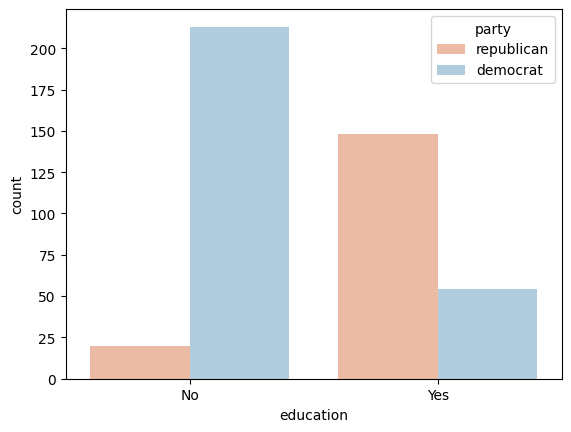

In [11]:
# Groupby party and get counts of education values
print(votes.groupby(['party', 'education'])['education'].count())
# countplot of the 'education' bill categorized by party
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=votes, x=votes['education'], hue=votes['party'], palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

* It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

* Explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlaid onto the same figure.
    * Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlaid onto the same figure. 

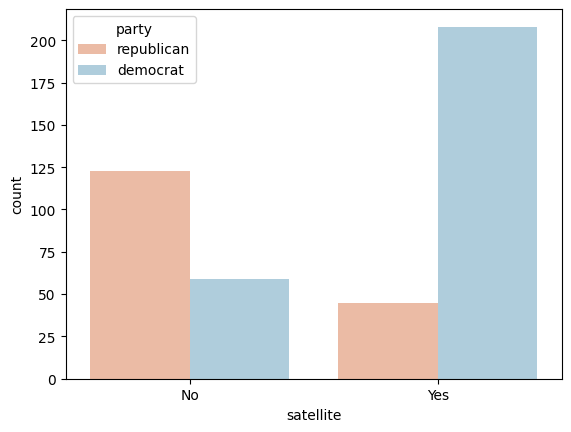

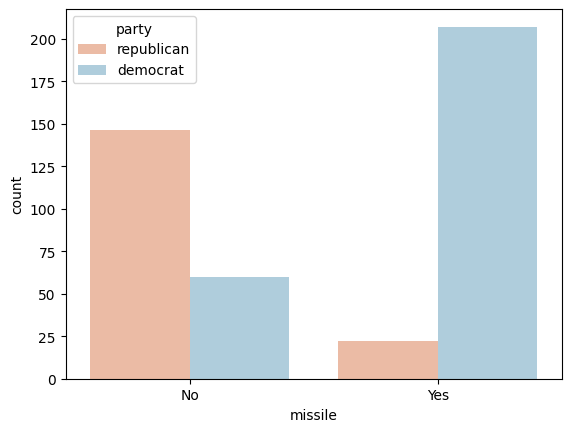

In [12]:
# Satelite Bill
sns.countplot(data=votes, x='satellite', hue='party', palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Missile bill
plt.figure() # clear current plot instance figure
sns.countplot(data=votes, x='missile', hue='party', palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier

In [13]:
# Create arrays X and y for the features and the target variable
X = votes.drop('party', axis=1).values # party is our target variable of interest
y = votes['party'].values 
# Validate Same Amount of Rows
assert X.shape[0] == y.shape[0]
print('Assertion Passed!', f"{X.shape} is our features shape, {y.shape} is our total target values" )

Assertion Passed! (435, 16) is our features shape, (435,) is our total target values


In [14]:
# Import Classifier Class Instance
from sklearn.neighbors import KNeighborsClassifier
# Create a k-nn cluster with 6 neighbors for voting
knn = KNeighborsClassifier(n_neighbors=6)
# Fit classifier to Data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [15]:
import numpy as np

# X_new values from exercise
X_new = np.array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,0.42310646, 0.9807642 , 0.68482974, 0.4809319, 0.39211752, 0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426, 0.73799541]])

# Predict the labels for the training data X
y_pred = knn.predict(X)
#print(f'Training predictions : {y_pred}')

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Test Predictions: {}".format(new_prediction))

Test Predictions: ['democrat']


### Measuring Model Performance

#### Train_Test_Split
* Quick note on Stratify argument
* This `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
    * For example, if variable **y** is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

* `stratifying` preserves the proportion of how data is distributed in the `target` column - and depicts that same proportion of distribution in the train_test_split. 
    * Take for example, if the problem is a binary classification problem, and the target column is having proportion of 80% = yes, and 20% = no. 
    * Since there are 4 times more 'yes' than 'no' in the target column, by splitting into train and test without stratifying, we might run into the trouble of having only the 'yes' falling into our training set, and all the 'no' falling into our test set.(i.e, the training set might not have 'no' in its target column)


#### Under/Over Fitting
* Sweet Spot in the middle where testing has higher accuracy on descending training accuracy 

![Screen Shot 2023-03-23 at 12.35.14 PM](Screen%20Shot%202023-03-23%20at%2012.35.14%20PM.png)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

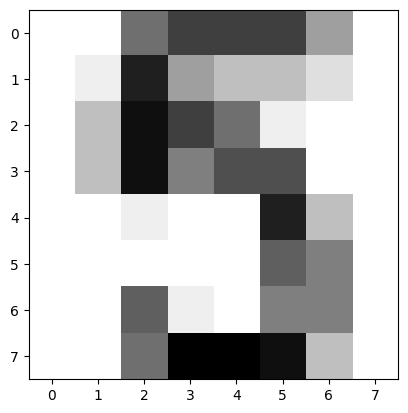

In [16]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

* Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [17]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

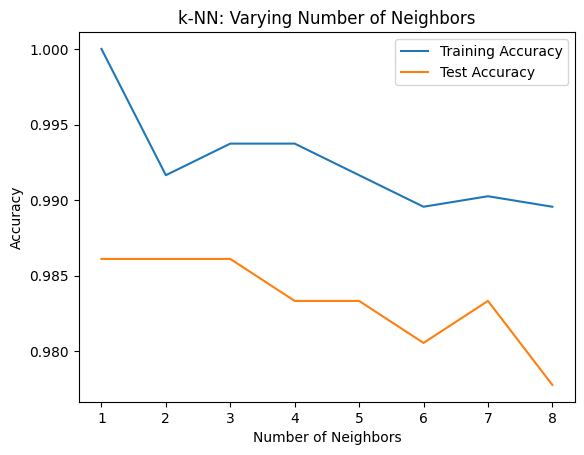

In [18]:
# Setup arrays to store train and test accuracies
# neighbors range from to 1 - 8
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Generate different accuracy scores using existing split data stratified by our target for equal train/test proportions
for i, k in enumerate(neighbors):
    # i is index based 0-7, k is 1-8
    # Instantiate KNN model with k - nearest neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit model to existing train_test_split above
    knn.fit(X_train, y_train)
    # Compute accuracy on training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute accuracy on test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Regression
* `OLS` : (Ordinary Least Squares) - Minimize sum of squares of residuals 

#### Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

* Since the target variable here is **quantitative**, this is a `regression problem`. 
    * To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [19]:
# Read the CSV file into a DataFrame: df
df = gapminder.copy()
display(df.head())
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


[[1.28      ]
 [1.40877551]
 [1.53755102]
 [1.66632653]
 [1.79510204]] <class 'numpy.ndarray'> (50, 1)
0.6192442167740035


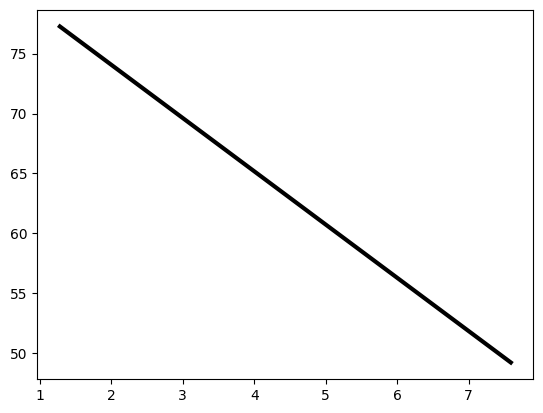

In [20]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create a LinearRegression regressor called reg.
reg = LinearRegression()

# Set up the prediction space to range from the minimum to the maximum of fertility - np.linspace for evenly spaced numbers over interval
prediction_space = np.linspace(df['fertility'].min(), df['fertility'].max()).reshape(-1,1)
print(prediction_space[:5], type(prediction_space), prediction_space.shape)

# Set Feature and Target (reshape for sci-kit) - using fertility as feature to predict life values
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

### Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the 
 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. T

In [21]:
# Drop non numeric feature for model
df_non_region = df.drop('Region', axis=1)

# Create features, target arrays 
X_non_region = df_non_region.drop('life', axis=1).values
y_non_region = df_non_region['life'].values.reshape(-1, 1)
print(type(X_non_region), X_non_region.shape, '\n', type(y_non_region), y_non_region.shape)

## Import train_test_split and mean_squared error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X_non_region, y_non_region, test_size=.3, random_state=42)

# Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
reg_all = LinearRegression().fit(X_train, y_train)

# Predict on the test_data
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error: {}".format(rmse))

<class 'numpy.ndarray'> (139, 8) 
 <class 'numpy.ndarray'> (139, 1)
R^2: 0.8380468731429359
Root Mean Squared Error: 10.546912775062186


### Cross-validation
* If you're computing `R squared` on your test set, the R squared returned is dependent on the way that you split up the data! 
* The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data. 
    * To combat this dependence on what is essentially an arbitrary split, we use a technique called `cross-validation`.

* Cross-validation can be thought of **K** fold type training for a model. Using the different folds to train/test the model can be computationally expensive but can be great for higher training/predictive ability

![Screen Shot 2023-03-27 at 1.43.01 PM](Screen%20Shot%202023-03-27%20at%201.43.01%20PM.png)

<br>

#### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data.

In [22]:
# Use df_non_region values and same features/target values : X_non_region & y_non_region

# Iport score by cross-validation
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_non_region, y_non_region, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793223


#### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In [23]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X_non_region, y_non_region, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X_non_region, y_non_region, cv=10)
print(np.mean(cvscores_10))

0.8718712782622107
0.8436128620131196


In [24]:
%timeit cross_val_score(reg, X_non_region, y_non_region, cv=10)

10.5 ms ± 90.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit cross_val_score(reg, X_non_region, y_non_region, cv=3)

3.29 ms ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Regularized regression
When fitting a linear regression does is minimize a loss function to choose a coefficient ai for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. It isn't so easy to see in two dimensions, but when you have loads and loads of features, that is, if your data sit in a high-dimensional space with large coefficients, it gets easy to predict nearly anything. 
* For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients. 
* This is called `regularization`. 
    * The first type of regularized regression that we'll look at is called `ridge regression`


#### Regularization I: Lasso
In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of feature

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


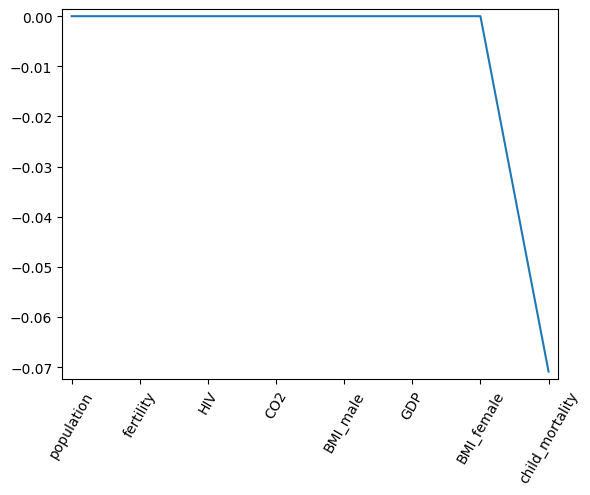

In [26]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data and compute the coefficients using the coef_ attribute.
lasso.fit(X_non_region, y_non_region)

lasso_coef = lasso.coef_
print(lasso_coef)


# Plot the coefficients on the y-axis and column names on the x-axis.
# df_non_region_features dataframe not containing the primary feature (for column plotting use)
df_non_region_features = df_non_region[[x for x in df_non_region.columns if x != 'life']]
df_nr_features_cols = df_non_region_features.columns

# Plot using coefficients
plt.plot(range(len(df_nr_features_cols)), lasso_coef)
plt.xticks(range(len(df_nr_features_cols)), df_nr_features_cols.values, rotation=60)
plt.margins(0.02)
plt.show()

* According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

#### Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as regularization because the regularization term is the norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated scores for each, using this function that we have defined for you, which plots the score as well as standard error for each alpha:

In [27]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

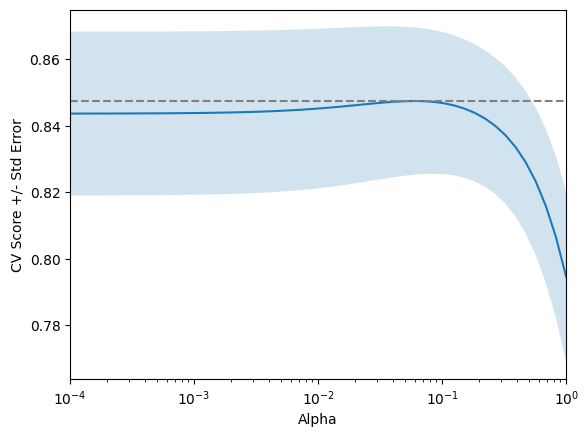

In [28]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_non_region, y_non_region, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


* Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?

## How good is your model?

#### Confusion Matrix
|Actual|Predicted : Spam Email | Predicted : Real Email | 
|-----|-------|----|
|Actual : Spam Email|True Positive|False Negative|
|Actual : Real Email|False Positive|True Negative|


#### Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

#### Tasks
Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [29]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Import classification_report and confusion_matrix from sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and testing sets with 40% of the data used for testing. Use a random state of 42
X = diabetes.drop('diabetes', axis=1) # can pass as dataframe to split
y = diabetes['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### Logistic regression and the ROC curve

In [31]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression

# Create training and test sets : (Using same features above for X and y )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

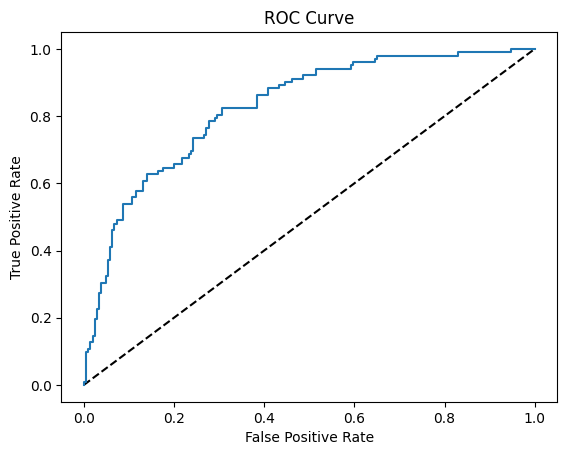

In [32]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

* This `ROC` curve provides a nice visual way to assess your classifier's performance.

#### Area under the ROC curve
* Larger Area under the ROC curve = better model


#### AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [33]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, scoring='roc_auc')

# Print list of AUC scores (default cross_val_score for cv is 5)
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.8745283  0.83245283]


### Hyperparameter tuning
Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter:  
 controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large 
 can lead to an overfit model, while a small 
 can lead to an underfit model.

The hyperparameter space for 
 has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal 
 in this hyperparameter space

In [34]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7760971055088701


#### Hyperparameter tuning with RandomizedSearchCV
`GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

In [35]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.7331465919701214


### Hold-out set for final evaluation
* The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

<br>

### Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to 
, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [36]:
dtb = diabetes.copy()

# Set features for diabetes
dtb_X = diabetes.drop('diabetes', axis=1)
dtb_y = diabetes['diabetes'].values

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets : the test set here will function as the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(dtb_X, dtb_y, test_size=.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 2275.845926074791, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7760869565217391


### Hold-out set in practice II: Regression
Remember lasso and ridge regression from the previous chapter? Lasso used the 
penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the and penalties

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [41]:
# Import necessary modules (others already imported)
from sklearn.linear_model import ElasticNet

# Create arrays for features and target variable : df_non_region is dataframe we want to do for the life variable
display(df_non_region.head())

# Pass as numpy arrays
X_gminder = df_non_region.drop('life', axis=1).values 
y_gminder = df_non_region['life'].values

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_gminder, y_gminder, test_size=.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set : grid_search will use the passed predictor (model instance) to predict on estimator w/best found params
y_pred = gm_cv.predict(X_test)

# Score : coefficient for R^2
r2 = gm_cv.score(X_test, y_test)

# Compute the and mean squared error.
mse = mean_squared_error(y_test, y_pred)

# print out score and model best hyper parameters
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398441


## Preprocessing data
This chapter introduces pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous chapters.

### Categorical Features
* `Sci-kit learn` will not accept categorical features by default
* Need to **encode** categorical features numerically
* Convert to `dummy variables`
    *  `0`: Observation was NOT that Category
    *  `1`: Observation was that Category


#### Exploring categorical features
The `Gapminder` dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

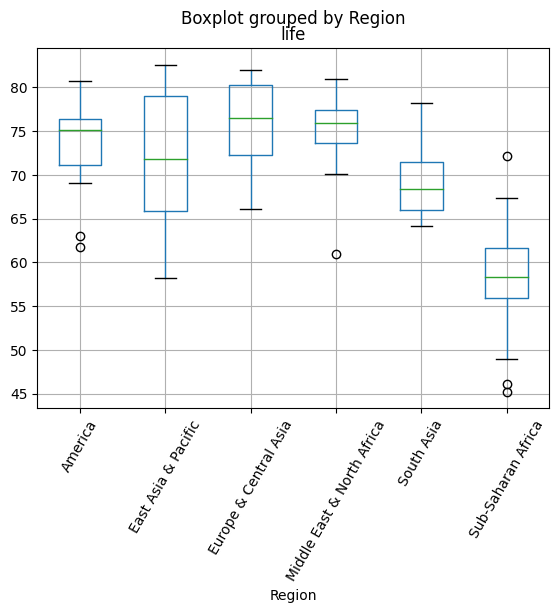

In [43]:
# Make copied instance of dataframe
gminder_pp = gapminder.copy()

# Use new dataframe instace to visualize life expectancy by region
import matplotlib.pyplot as plt

gminder_pp.boxplot('life', 'Region', rot=60)
plt.show()

### Creating Dummy Variables
* To **predict** life expectancy, retaining the `Region` column would be very useful
* However, it must be binarized in order to be accepted by sci-kit learn

In [47]:
# Create dummy variables: df_region
df_region = pd.get_dummies(gminder_pp)

# Print columns of df_region
display(df_region.head(2))

# Use the get_dummies() function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').
df_region = pd.get_dummies(gminder_pp, drop_first=True)

# Print new columns of df_region
print('\n')
display(df_region.head(2))

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1


### Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

In [48]:
# Create features and target values
X = df_region.drop('life', axis=1).values
y = df_region['life'].values 

# Ridge regression (alpha=.5, normalize)
ridge = Ridge(alpha=.5, normalize=True)

# Cross Validation score for default model score metrics 
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# print out score from 5-fold crossvalscore
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


### Pipelines (Imputing)

#### Dropping Missing Data
The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

```python
In [3]:
df[['synfuels', 'education', 'salvador']].head()
Out[3]:

# Inspect a few columns in which missing values have been labeled with a '?'
  synfuels education salvador
0        ?         1        1
1        0         1        1
2        1         0        1
3        1         0        ?
4        1         ?        1

# Convert ? to nan
In [4]:
df_copy = df[['synfuels', 'education', 'salvador']].head()
In [5]:
df_copy
Out[5]:

    
# Quick copy of head dataframe
  synfuels education salvador
0        ?         1        1
1        0         1        1
2        1         0        1
3        1         0        ?
4        1         ?        1
In [6]:
# set any found value in the df with a value of '?' to np.nan
df_copy[df_copy == '?'] = np.nan
In [7]:
df_copy
Out[7]:

  synfuels education salvador
0      NaN         1        1
1        0         1        1
2        1         0        1
3        1         0      NaN
4        1       NaN        1

# Full Exercise
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))
<script.py> output:
    party                  0
    infants               12
    water                 48
    budget                11
    physician             11
    salvador              15
    religious             11
    satellite             14
    aid                   15
    missile               22
    immigration            7
    synfuels              21
    education             31
    superfund             25
    crime                 17
    duty_free_exports     28
    eaa_rsa              104
    dtype: int64
    Shape of Original DataFrame: (435, 17)
    Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)
```
* It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

### Imputing missing data in a ML Pipeline I
As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

```python
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp (impute along the columns not rows)
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]
```


### Imputing missing data in a ML Pipeline II
Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!
```python
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# shape of target/features
print(X.shape, y.shape)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

<script.py> output:
    (435, 16) (435,)
                 precision    recall  f1-score   support
    
       democrat       0.99      0.96      0.98        85
     republican       0.94      0.98      0.96        46
    
    avg / total       0.97      0.97      0.97       131
```

## Centering and scaling : Why Scale Your Data
* Many models use some form of **distance** to inform them
* Features on larger scales can unduly influence the model
* Example : `KNN` uses distance explicitly when making predictions
* We want features to be on a similar scale
    * Hello! Normalizing (scaling & centering) 



### White Wine DataSet
Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.
* Will be looking at the quality as the target with all other columns as features

In [53]:
whitewine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [52]:
# Import Scale
from sklearn.preprocessing import scale

# Set features and targets from white wine dataset
ww_scale = whitewine.copy()
# Drop Quality Target/Dependent
ww_X = ww_scale.drop('quality',axis=1).values
# Set Target
ww_y = ww_scale['quality'].values

ww_X_scaled = scale(ww_X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(ww_X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(ww_X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(ww_X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(ww_X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7452128118308485e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [70]:
print(type(ww_X_scaled))

# quick look at scaled return values
print(ww_X.shape, ww_X_scaled.shape)
print(ww_X[:2], '\n' ,ww_X_scaled[:2])

# Example of Unscaled mean for first column of numpy.nd array
ww_X[:, 0].sum() / ww_X[:, 0].shape[0]

<class 'numpy.ndarray'>
(4898, 11) (4898, 11)
[[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
  1.001e+00 3.000e+00 4.500e-01 8.800e+00]
 [6.300e+00 3.000e-01 3.400e-01 1.600e+00 4.900e-02 1.400e+01 1.320e+02
  9.940e-01 3.300e+00 4.900e-01 9.500e+00]] 
 [[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01  2.82134917e+00
  -3.53550004e-02  5.69931577e-01  7.44565035e-01  2.33151201e+00
  -1.24692128e+00 -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 -9.44765273e-01
   1.47747079e-01 -1.25301866e+00 -1.49684624e-01 -9.15417164e-03
   7.40028640e-01  1.34184656e-03 -8.24275678e-01]]


6.854787668436097

In [69]:
# look at x (column alias) for numpy array
print([x for x in range(ww_X.shape[1])])
# mean value for each column with list comprehension
mean_col_values_features = [ww_X[:, x].sum() / ww_X[:, x].shape[0] for x in range(ww_X.shape[1])]
print(mean_col_values_features, sum(mean_col_values_features)/len(mean_col_values_features))
print("The Mean of the the unscaled features (equal to unscaled features above) : {}".format(
sum(mean_col_values_features)/len(mean_col_values_features)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[6.854787668436097, 0.27824111882400976, 0.33419150673744386, 6.391414863209474, 0.045772356063699456, 35.30808493262556, 138.36065741118824, 0.9940273764801959, 3.1882666394446715, 0.48984687627603113, 10.514267047774602] 18.432687072460002
The Mean of the the unscaled features (equal to unscaled features above) : 18.432687072460002


* Above is just a bit for my understanding of how the `np.mean` and `np.std` calls are being evaluated for the numpy.nd array
* For example : mean of unsxaled features is get the mean of each column and then using all the means together for an aggregated mean (aka : sum of mean_col_features / len)


### Centering and scaling in a pipeline
With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

In [72]:
# Import Pipeline, Standard Scaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Setup the pipeline steps : tuple of instances in order (Scale / Estimator)
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

# Create the pipeline 
pipeline = Pipeline(steps)

# Create train and test sets : use raw features/targets classified above in the wine df cell a few above
X_train, X_test, y_train, y_test = train_test_split(ww_X, ww_y, test_size=.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data (default neighbors)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


### Bringing it all together I: Pipeline for classification
It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

* They altered the target parameter `y` to a boolean (unsure of why but doesn't work with wine dataset similar to above)

```python
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space : To specify the hyperparameter space, use 'SVM__C' and 'SVM__gamma'
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

<script.py> output:
    Accuracy: 0.7795918367346939
                 precision    recall  f1-score   support
    
          False       0.83      0.85      0.84       662
           True       0.67      0.63      0.65       318
    
    avg / total       0.78      0.78      0.78       980
    
    Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}
```

### Bringing it all together II: Pipeline for regression
For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.


```python
# Setup the pipeline steps: steps 
# Imputer : missing values = labels of mvalues in frame, strategy (value = 'mean'), axis=0 (impute on columns not rows)
# 1) Impute (fill missing values), 2) Scale values, 3) Instantiate Regressor
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
<script.py> output:
    Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
    Tuned ElasticNet R squared: 0.8862016570888217
```